## 5.1 自己位置推定の問題と解放
### 5.1.1 計算すべき確率分布と利用できる情報
### 5.1.2 信念
### 5.1.3 信念の演算
遷移後の信念分布 $\hat{b}_t$ とすると、この分布は、
$$
    \hat{b}_t(x) = p_t(x | x_0, \mathbf{u}_{1:t}, \mathbf{z}_{1:t})
$$
で表される。
この遷移は
$$
    \hat{b}_t(x) = \int_{x' \in \chi} p( x | x', \mathbf{u}_t) b_{t-1}(x') dx' = < p(x | x', u_t) >_{b_{t-1}(x')} 
$$
が成り立つ。
ベイズの定理を用いて、
$$
    b_t(x) = \hat{b}_t(x|\mathrm{z}_t) = \frac{p(\mathrm{z}_t | x) \hat{b}_t(x)}{p(\mathrm{z}_t)} = \eta p(\mathrm{z}_t | x ) \hat{b}_t(x)
$$
と表せる。
自己位置推定は常軌を交互に用いて信念分布を更新していく。
このようなアルゴリズムは$\bf{ベイズフィルタ}$と呼ばれる。

## 5.2 パーティクルの準備
MCL(Monte Carlo Localization) はパーティクルを使ってベイズフィルタを実装したものになる。

In [4]:
import sys
sys.path.append('./scripts/')
from robot import *

In [5]:
class EstimationAgent(Agent):
    def __init__(self, nu, omega):
        super().__init__(nu, omega)
        
    def draw(self, ax, elems):
        elems.append(ax.text(0, 0, "hoge", fontsize=10))

<IPython.core.display.Javascript object>


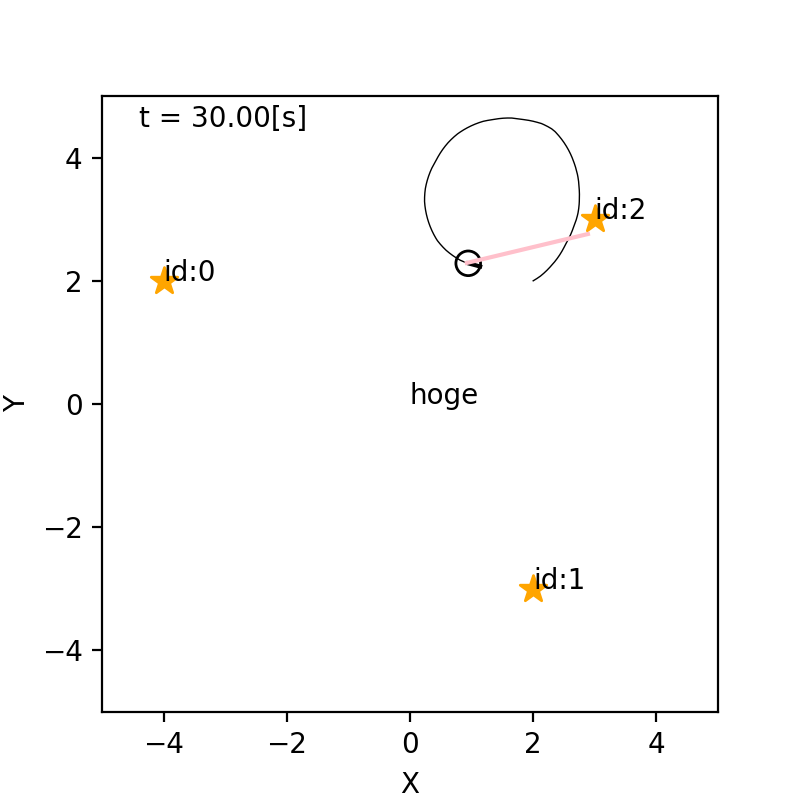

In [7]:
world = World(30, 0.1)

m = Map()
for ln in [(-4, 2), (2, -3), (3, 3)]:
    m.append_landmark(Landmark(*ln))
world.append(m)

initial_pose = np.array([2, 2, math.pi/6]).T
circling = EstimationAgent(0.2, 10.0/180*math.pi)
r = Robot(initial_pose, sensor=Camera(m), agent=circling)
world.append(r)

world.draw()

In [13]:
class Particle:
    def __init__(self, init_pose):
        self.pose = init_pose
        
class Mcl:
    def __init__(self, init_pose, num):
        self.particles = [Particle(init_pose) for i in range(num)]
    
    def draw(self, ax, elems):
        xs = [p.pose[0] for p in self.particles]
        ys = [p.pose[1] for p in self.particles]
        vxs = [math.cos(p.pose[2]) for p in self.particles]
        vys = [math.sin(p.pose[2]) for p in self.particles]
        elems.append(ax.quiver(xs, ys, vxs, vys, color="blue", alpha=0.5))
        
class EstimationAgent(Agent):
    def __init__(self, nu, omega, estimator):
        super().__init__(nu, omega)
        self.estimator = estimator
        
    def draw(self, ax, elems):
        #elems.append(ax.text(0, 0, "hoge", fontsize=10))
        self.estimator.draw(ax, elems)

<IPython.core.display.Javascript object>


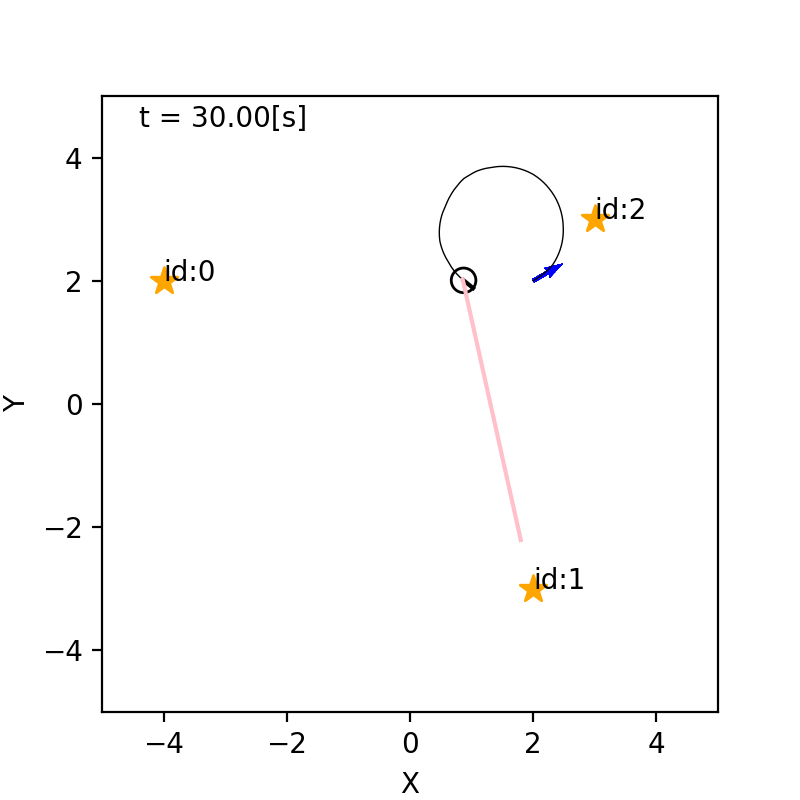

In [14]:
world = World(30, 0.1)

m = Map()
for ln in [(-4, 2), (2, -3), (3, 3)]:
    m.append_landmark(Landmark(*ln))
world.append(m)

initial_pose = np.array([2, 2, math.pi/6]).T
estimator = Mcl(initial_pose, 100)
circling = EstimationAgent(0.2, 10.0/180*math.pi, estimator)
r = Robot(initial_pose, sensor=Camera(m), agent=circling)
world.append(r)

world.draw()

## 5.3 移動後のパーティクルの姿勢更新